In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
X = pd.read_csv("../input/banking-dataset-classification/new_train.csv")
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
X.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


# Preprocessing

In [6]:
X.y = X.y.apply(lambda x: 0 if x == "yes" else 1)
X.y

0        1
1        1
2        0
3        1
4        1
        ..
32945    1
32946    1
32947    1
32948    1
32949    1
Name: y, Length: 32950, dtype: int64

In [7]:
jobs = list(set(pd.Categorical(X.job)))
marital_status = list(set(pd.Categorical(X.marital)))
education = list(set(pd.Categorical(X.education)))
housing = list(set(pd.Categorical(X.housing)))
loan = list(set(pd.Categorical(X.loan)))
contact = list(set(pd.Categorical(X.contact)))
month = list(set(pd.Categorical(X.month)))
day_of_week = list(set(pd.Categorical(X.day_of_week)))
poutcome = list(set(pd.Categorical(X.poutcome)))
default = list(set(pd.Categorical(X.default)))

In [8]:
def numerize(df, col, tuple):
    df[col] = df[col].apply(lambda x: tuple.index(x))

In [9]:
numerize(X, 'job', jobs)
numerize(X, 'marital', marital_status)
numerize(X, 'education', education)
numerize(X, 'housing', housing)
numerize(X, 'loan', loan)
numerize(X, 'contact', contact)
numerize(X, 'month', month)
numerize(X, 'day_of_week', day_of_week)
numerize(X, 'poutcome', poutcome)
numerize(X, 'default', default)

In [10]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,4,2,3,0,1,1,1,1,2,227,4,999,0,1,1
1,37,9,2,7,1,1,1,0,1,2,202,2,999,1,0,1
2,78,11,2,2,1,1,1,1,8,4,1148,1,999,0,1,0
3,36,2,2,7,1,2,1,0,5,4,120,2,999,0,1,1
4,59,11,3,7,1,1,1,1,9,3,368,2,999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,1,1,1,1,2,1,1,8,3,192,1,999,0,1,1
32946,52,3,2,6,1,2,1,1,1,0,64,1,999,1,0,1
32947,54,2,2,3,1,1,2,1,8,4,131,4,999,0,1,1
32948,29,2,2,7,1,1,1,0,5,0,165,1,999,0,1,1


In [11]:
X.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,3.882185,1.826646,4.141639,0.789469,1.499484,1.128285,0.634537,4.719484,2.017208,258.127466,2.560607,962.052413,0.174719,0.929469,0.887344
std,10.403636,2.674920,0.608542,2.413089,0.407915,0.546191,0.400186,0.481567,3.100442,1.413454,258.975917,2.752326,187.951096,0.499025,0.364187,0.316176
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,103.000000,1.000000,999.000000,0.000000,1.000000,1.000000
50%,38.000000,3.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,5.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.000000,1.000000
75%,47.000000,4.000000,2.000000,7.000000,1.000000,2.000000,1.000000,1.000000,8.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.000000,1.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.000000


In [12]:
X.duration=(X.duration-X.duration.min())/(X.duration.max()-X.duration.min())
X.pdays=(X.pdays-X.pdays.min())/(X.pdays.max()-X.pdays.min())
X.age=(X.age-X.age.min())/(X.age.max()-X.age.min())

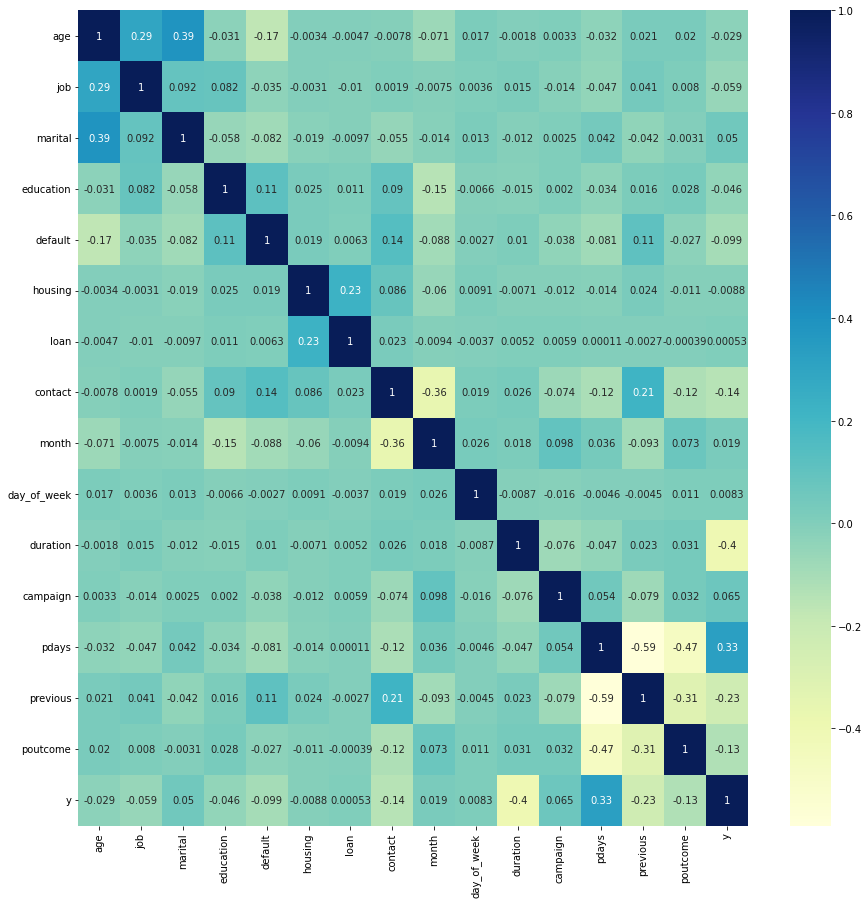

In [13]:
fig, ax = plt.subplots(figsize=(15,15))    
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [14]:
Y = X.y
X = X.drop(['y'], axis = 1)

In [15]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,0.395062,4,2,3,0,1,1,1,1,2,0.046157,4,1.0,0,1
1,0.246914,9,2,7,1,1,1,0,1,2,0.041074,2,1.0,1,0
2,0.753086,11,2,2,1,1,1,1,8,4,0.233428,1,1.0,0,1
3,0.234568,2,2,7,1,2,1,0,5,4,0.024400,2,1.0,0,1
4,0.518519,11,3,7,1,1,1,1,9,3,0.074827,2,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0.135802,1,1,1,1,2,1,1,8,3,0.039040,1,1.0,0,1
32946,0.432099,3,2,6,1,2,1,1,1,0,0.013013,1,1.0,1,0
32947,0.456790,2,2,3,1,1,2,1,8,4,0.026637,4,1.0,0,1
32948,0.148148,2,2,7,1,1,1,0,5,0,0.033550,1,1.0,0,1


In [16]:
X.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,0.284125,3.882185,1.826646,4.141639,0.789469,1.499484,1.128285,0.634537,4.719484,2.017208,0.052486,2.560607,0.963015,0.174719,0.929469
std,0.128440,2.674920,0.608542,2.413089,0.407915,0.546191,0.400186,0.481567,3.100442,1.413454,0.052659,2.752326,0.188139,0.499025,0.364187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.185185,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.020943,1.000000,1.000000,0.000000,1.000000
50%,0.259259,3.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,5.000000,2.000000,0.036600,2.000000,1.000000,0.000000,1.000000
75%,0.370370,4.000000,2.000000,7.000000,1.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.064864,3.000000,1.000000,0.000000,1.000000
max,1.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1.000000,56.000000,1.000000,7.000000,2.000000


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# KNN (K-Nearest Neighbour) CLASSIFICATION
### 4 neighbours

Score for Number of Neighbors = 4: 0.8749620637329287
              precision    recall  f1-score   support

           0       0.42      0.25      0.31       748
           1       0.91      0.95      0.93      5842

    accuracy                           0.87      6590
   macro avg       0.66      0.60      0.62      6590
weighted avg       0.85      0.87      0.86      6590



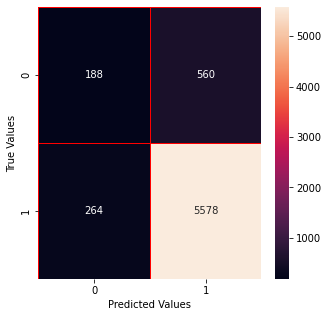

In [18]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 4: {}".format(knn.score(x_test,y_test)))

y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 3: 0.8825493171471928
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       748
           1       0.90      0.97      0.94      5842

    accuracy                           0.88      6590
   macro avg       0.68      0.58      0.60      6590
weighted avg       0.85      0.88      0.86      6590



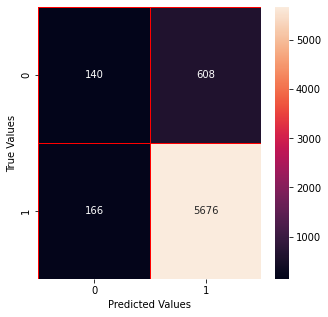

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))

y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 2: 0.817298937784522
              precision    recall  f1-score   support

           0       0.28      0.39      0.33       748
           1       0.92      0.87      0.89      5842

    accuracy                           0.82      6590
   macro avg       0.60      0.63      0.61      6590
weighted avg       0.85      0.82      0.83      6590



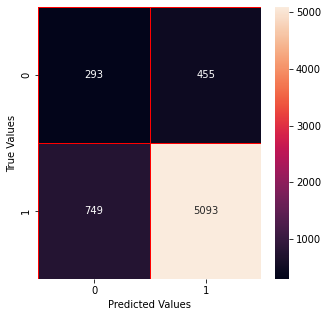

In [20]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 2: {}".format(knn.score(x_test,y_test)))

y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# DECISION TREE CLASSIFICATION

Decision Tree Classification Score:  0.880576631259484
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       748
           1       0.93      0.93      0.93      5842

    accuracy                           0.88      6590
   macro avg       0.70      0.70      0.70      6590
weighted avg       0.88      0.88      0.88      6590



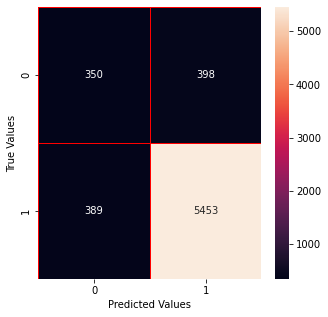

In [21]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# RANDOM FOREST CLASSIFICATION

Random Forest Classification Score(estimators = 100):  0.9063732928679817
              precision    recall  f1-score   support

           0       0.64      0.39      0.49       748
           1       0.93      0.97      0.95      5842

    accuracy                           0.91      6590
   macro avg       0.78      0.68      0.72      6590
weighted avg       0.89      0.91      0.90      6590



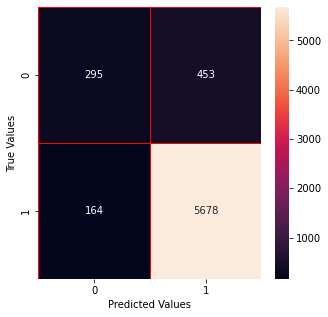

In [22]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=38)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score(estimators = 100): ",rand_forest.score(x_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score(estimators = 140):  0.9045523520485584
              precision    recall  f1-score   support

           0       0.63      0.38      0.48       748
           1       0.92      0.97      0.95      5842

    accuracy                           0.90      6590
   macro avg       0.78      0.68      0.71      6590
weighted avg       0.89      0.90      0.89      6590



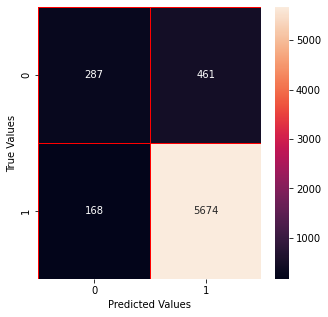

In [23]:
rand_forest = RandomForestClassifier(n_estimators=140, random_state=38)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score(estimators = 140): ",rand_forest.score(x_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score(estimators = 80):  0.9051593323216995
              precision    recall  f1-score   support

           0       0.63      0.39      0.48       748
           1       0.93      0.97      0.95      5842

    accuracy                           0.91      6590
   macro avg       0.78      0.68      0.71      6590
weighted avg       0.89      0.91      0.89      6590



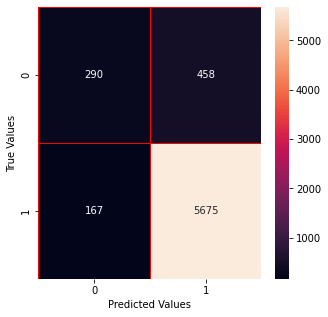

In [24]:
rand_forest = RandomForestClassifier(n_estimators=80, random_state=38)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score(estimators = 80): ",rand_forest.score(x_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()